# 2-way Model Sicily Early

In [14]:
import numpy as np
import os  # For Saving to Folder
import pandas as pd
import matplotlib.pyplot as plt

import socket
import os as os
import sys as sys
import multiprocessing as mp
import itertools as it
from time import time

# For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
# Make sure to have the font installed (it is on cluster for Harald)
rcParams['font.sans-serif'] = ['Arial']

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/punic_aDNA/"  # The Path on Midway Cluster
else:
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
os.sys.path.append(path)
# Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")
print(sys.version)

compute-e-16-235.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/punic_aDNA
CPU Count: 28
3.7.4 (default, Sep 11 2019, 11:24:51) 
[GCC 6.2.0]


### Do qpAdm Function Imports and Definitions

In [15]:
from python.run_qpadm import qpAdm_run, get_meta_ind_table, modifiy_iid_files, set_iids_to_label
from python.plot_qpadm import plot_qpadm

### Parameters for qpAdm_run are set there!
a12 = ["Mota", "Ust_Ishim", "Kostenki14", "GoyetQ116-1", "Vestonice16", "MA1",
           "ElMiron", "Villabruna", "EHG", "CHG", "Natufian",
           "Levant_N"] # List of ancient European populations for right populations
distal = ["Anatolia_N", "WHG", "Steppe_EMBA", 
          "Iran_N", "Morocco_EN.SG"]
print(f"# Anc_Euro: {len(a12)} populations")
print(f"# Distal sources:{len(distal)} populations")

# Anc_Euro: 12 populations
# Distal sources:5 populations


# 1) Modify .ind File

### Optional: Screen for Population Lables in anno file

In [117]:
vrs = "49.2"
df = get_meta_ind_table(path_ind = f"./eigenstrat/anc_only.v{vrs}_outgroups.ind",
                        path_anno = f"/n/groups/reich/hringbauer/Data/v{vrs}.anno.csv",
                        min_snp = 30000)
### Screen for what one wants
df[df["clst"].str.contains("Levant_N")]["clst"].value_counts()

Filtering to 1137/1142
Loaded 1137 Individuals
Filtered to 1091 Individuals based on #SNP covered> 30000
Filtered to 1002 Individuals based on duplicates.


Levant_N    12
Name: clst, dtype: int64

### 1a) Prepare Early Punic Individuals
Load data table with individual assignments - and produce modified .ind file for use in qpadm

In [44]:
### Populations to overwrite. Typically because they have the ".SG" label
ind_merged = f"./eigenstrat/anc_only.v{vrs}_outgroups.ind"          # What .ind to load
ind_modified = f"./eigenstrat/anc_only.v{vrs}.punic_early.ind"    # Where to save the modified version to

df_ind = pd.read_csv(ind_merged, delim_whitespace=True, header=None)
df_ind.columns=["iid", "sex", "clst"]
print(f"Loaded {len(df_ind)} Individuals")

df_lbs = pd.read_csv("./data/cluster_assignments_punic.v49.2.tsv", sep="\t")  ### Load external Label file (Google docs)

### Reset Clusters
for _, row in df_lbs.iterrows():
    iid = row['iid']
    
    idx = df_ind["iid"] == iid
    if np.sum(idx)<1:
        print(f"Warning, {iid} not found in original .ind file.")
    
    df_ind.loc[idx, "clst"] = row["clst_qpadm"]
    ### Reset All the Individuals in the Target Ind
    #df_ind = set_iids_to_clst(df_ind, iids=iids, clst=g, savepath="")
    
    
#df_ind[df_ind["clst"].str.contains("CentralMed")]  
df_ind.to_csv(ind_modified, header=False, sep=" ", index=False)
print(f"Saved updated {len(df_ind)} IIDs to: {ind_modified}")

Loaded 1142 Individuals
Warning, I26842 not found in original .ind file.
Saved updated 1142 IIDs to: ./eigenstrat/anc_only.v49.2.punic_early.ind


### Update other labels in Ind file

# 2) Run qpAdm

## 2a) Distal Modelling

### Test run for single Population

In [76]:
%%time

target = "PunicCentralMedEarly"  
sources = ["Anatolia_N", "WHG", "Steppe_EMBA", "Algeria_IA", "Iran_N"]  # Morocco_EN.SG, Algeria_IA
rightpops = a12 + ["Morocco_EN.SG"]

leftpops = [target] + sources
qpAdm_run(leftpops = leftpops, rightpops = rightpops, 
          output_file = ".".join(leftpops), 
          input_folder = "./eigenstrat/", 
          input_file = "anc_only.v49.2",
          input_ind_suff = ".punic_early",
          par_file_folder = "./parfiles/", 
          output_folder = "./output/qpAdm/v49.2/area51/", 
          path_bin_qpAdm = "/n/groups/reich/hringbauer/git/AdmixTools/bin/qpAdm",
          all_snps=False)

Runtime: 71.935899
CPU times: user 837 µs, sys: 11.8 ms, total: 12.7 ms
Wall time: 1min 11s


0

### Run distal Models for all Reference Populations of Interest

In [ ]:
%%time

target = "PunicCentralMedEarly"  
sources = ["Anatolia_N", "WHG", "Steppe_EMBA", "Algeria_IA", "Iran_N"]  # Morocco_EN.SG, Algeria_IA
rightpops = a12 + ["Morocco_EN.SG"]

leftpops = [target] + sources
qpAdm_run(leftpops = leftpops, rightpops = rightpops, 
          output_file = ".".join(leftpops), 
          input_folder = "./eigenstrat/", 
          input_file = "anc_only.v49.2",
          input_ind_suff = ".punic_early",
          par_file_folder = "./parfiles/", 
          output_folder = "./output/qpAdm/v49.2/area51/", 
          path_bin_qpAdm = "/n/groups/reich/hringbauer/git/AdmixTools/bin/qpAdm",
          all_snps=False)

### 2b) Distal Modelling for all source groups of interest

In [115]:
%%time

targets = ["PunicCentralMedEarly", "Algeria_IA", 
           "Italy_Sicily_IA_Polizzello", 
           "Greece_BA_Mycenaean", "Spain_IA", "Italy_Sardinia_BA_Nuragic",
           "Israel_Phoenician", "Israel_C", "Israel_MLBA"]

sources = ["Anatolia_N", "WHG", "Steppe_EMBA", "Tunisia_LN", "Iran_N"]  # Morocco_EN.SG, Algeria_IA
rightpops = a12 + ["Morocco_EN.SG"]

for target in targets:
    leftpops = [target] + sources
    qpAdm_run(leftpops = leftpops, rightpops = rightpops, 
              output_file = ".".join(leftpops), 
              input_folder = "./eigenstrat/", 
              input_file = "anc_only.v49.2",
              input_ind_suff = ".punic_early",
              par_file_folder = "./parfiles/", 
              output_folder = "./output/qpAdm/v49.2/distal_grouped/", 
              path_bin_qpAdm = "/n/groups/reich/hringbauer/git/AdmixTools/bin/qpAdm",
              all_snps=False)

Runtime: 73.939624
Runtime: 70.965059
Runtime: 72.346694
Runtime: 74.537688
Runtime: 72.795099
Runtime: 71.895942
Runtime: 74.738380
Runtime: 72.115889
Runtime: 75.449765
CPU times: user 51.9 ms, sys: 65.1 ms, total: 117 ms
Wall time: 10min 58s


## 1,2,3-way models of proximal sources for "PunicCentralMedEarly"
No 1 or 2-way model of the expected sources work. p<<1e-5

Two fitting 3-way models:

Algeria_IA/Sicily_IA/Mycenean
p=0.0273     0.070     0.619     0.311

Algeria_IA/Mycenean/Spain_IA
p=0.122     0.089     0.654     0.257

To follow up on that add each of them as outgroup for the other [to be done]



In [103]:
%%time
srcs_pot = ["Algeria_IA", "Italy_Sicily_IA_Polizzello", "Israel_Phoenician", 
            "Greece_BA_Mycenaean", "Spain_IA"]
target = "PunicCentralMedEarly" 
rightpops = a12 + ["Morocco_EN.SG", "Iran_N"]

### Iterate over all pairs
for p in it.combinations(srcs_pot, r=3):  ### One run was with r=1
    leftpops = [target] + list(p)
    qpAdm_run(leftpops = leftpops, rightpops = rightpops, 
              output_file = ".".join(leftpops), 
              input_folder = "./eigenstrat/", 
              input_file = "anc_only.v49.2",
              input_ind_suff = ".punic_early",
              par_file_folder = "./parfiles/", 
              output_folder = "./output/qpAdm/v49.2/early_punic_proxi/", 
              path_bin_qpAdm = "/n/groups/reich/hringbauer/git/AdmixTools/bin/qpAdm",
              all_snps=False)

Runtime: 58.843453
Runtime: 61.138453
Runtime: 66.846062
Runtime: 67.749831
Runtime: 63.554857
Runtime: 69.523834
Runtime: 64.146633
Runtime: 69.976852
Runtime: 64.673063
Runtime: 70.726662
CPU times: user 56.6 ms, sys: 77.2 ms, total: 134 ms
Wall time: 10min 57s


### Follow up on the two three-way models
They are different in their third source (Spain_IA/Italy_Sicily_IA_Polizzello).
Put each of them as outgroup for each other

### Result:
Only one model survives!!


Algeria_IA Mycenean Spain_IA

p=0.134404     0.086     0.661     0.253

and

Algeria_IA Mycenean Sicilly-Polizello

p=0.00349    0.077     0.442     0.481 

In [106]:
%%time

target = "PunicCentralMedEarly"  
sources = ["Algeria_IA", "Greece_BA_Mycenaean", "Italy_Sicily_IA_Polizzello"]  # Flip last component with down
rightpops = a12 + ["Morocco_EN.SG", "Iran_N", "Spain_IA"] # Flip last component with up

leftpops = [target] + sources
qpAdm_run(leftpops = leftpops, rightpops = rightpops, 
          output_file = ".".join(leftpops), 
          input_folder = "./eigenstrat/", 
          input_file = "anc_only.v49.2",
          input_ind_suff = ".punic_early",
          par_file_folder = "./parfiles/", 
          output_folder = "./output/qpAdm/v49.2/area51/", 
          path_bin_qpAdm = "/n/groups/reich/hringbauer/git/AdmixTools/bin/qpAdm",
          all_snps=False)

Runtime: 60.914796
CPU times: user 4.01 ms, sys: 9.5 ms, total: 13.5 ms
Wall time: 1min


0

### 4-way proximal model for PunicCentralMedEarly
As another way to test Spain_IA vrs Polizello


Algeria_IA Greece_BA_Mycenaean Italy_Sicily_IA_Polizzello Spain_IA
p=0.136     0.082     0.453     0.310     0.156 

In [111]:
%%time

target = "PunicCentralMedEarly"  
sources = ["Algeria_IA", "Greece_BA_Mycenaean", "Italy_Sicily_IA_Polizzello", "Spain_IA"]  # Flip last component with down
rightpops = a12 + ["Morocco_EN.SG", "Iran_N"] # Flip last component with up

leftpops = [target] + sources
qpAdm_run(leftpops = leftpops, rightpops = rightpops, 
          output_file = ".".join(leftpops), 
          input_folder = "./eigenstrat/", 
          input_file = "anc_only.v49.2",
          input_ind_suff = ".punic_early",
          par_file_folder = "./parfiles/", 
          output_folder = "./output/qpAdm/v49.2/area51/", 
          path_bin_qpAdm = "/n/groups/reich/hringbauer/git/AdmixTools/bin/qpAdm",
          all_snps=False)

Runtime: 66.953734
CPU times: user 2.9 ms, sys: 12.1 ms, total: 15 ms
Wall time: 1min 6s


0

# 3) Plot Results

### 3)a) Plot single distal Model for Punic Early
Really good fit - Iran N needed (when put in outgroup model does not fit)
All components "Anatolia_N", "WHG", "Steppe_EMBA", "Algeria_IA", "Iran_N" needed.

Generally low standard errors (0-2%) - good model.

Definitely WHG in there (which is very low in Myceneans)

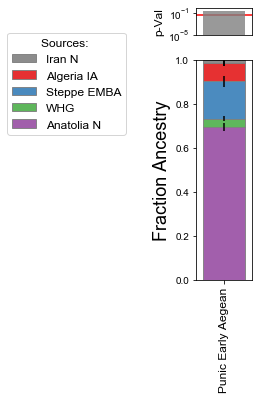

In [79]:
### Load the ancient Individual Label Data

t = "PunicCentralMedEarly"
sources = ["Anatolia_N", "WHG", "Steppe_EMBA", "Algeria_IA", "Iran_N"]
paths = [".".join([t]+sources)]

dir_path = f"./output/qpAdm/v49.2/area51/"
save_path = "" # ./figures/qpAdm/v44/4way_Canaanite.pdf
c = ["#984ea3", "#4daf4a", "#377eb8", "#e41a1c", "gray"]

xlabels = ["Punic Early Aegean"]
plot_qpadm(dir_path=dir_path, test_pops=paths, save_path=save_path,
           xlabels=xlabels, sort_p=True, labels=["Anatolia N", "WHG", "Steppe EMBA", "Algeria IA", "Iran N"],
           best=False, pval_lim = [1e-5,1], figsize=(1,5), bw=0.9, lw=1.5, 
           fs=12, c=c, ec="gray", l_pos=(-1.15, 1.15))

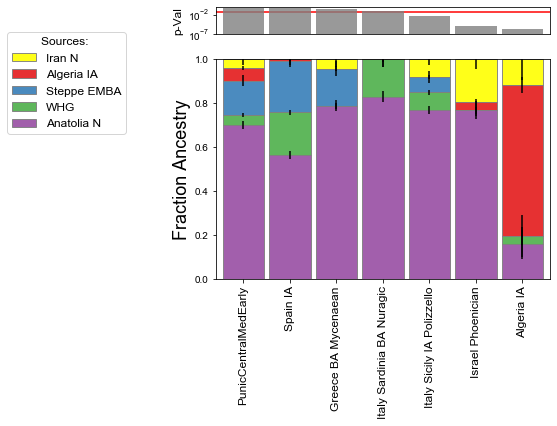

In [131]:
targets = ["PunicCentralMedEarly", "Algeria_IA", 
           "Italy_Sicily_IA_Polizzello", 
           "Greece_BA_Mycenaean", "Spain_IA", "Italy_Sardinia_BA_Nuragic",
           "Israel_Phoenician"]

sources = ["Anatolia_N", "WHG", "Steppe_EMBA", "Tunisia_LN", "Iran_N"]
paths = [".".join([t]+sources) for t in targets]

dir_path = f"./output/qpAdm/v49.2/distal_grouped/"
save_path = "" # ./figures/qpAdm/v44/4way_Canaanite.pdf
c = ["#984ea3", "#4daf4a", "#377eb8", "#e41a1c", "yellow"]

xlabels = [t.replace("_", " ") for t in targets]
plot_qpadm(dir_path=dir_path, test_pops=paths, save_path=save_path,
           xlabels=xlabels, sort_p=True, labels=["Anatolia N", "WHG", "Steppe EMBA", "Algeria IA", "Iran N"],
           best=True, pval_lim = [1e-7,1], figsize=(6,5), bw=0.9, lw=1.5, 
           fs=12, c=c, ec="gray", l_pos=(-0.25, 1.15))

### 3)b) Plot proximal Models

### Plot single Model

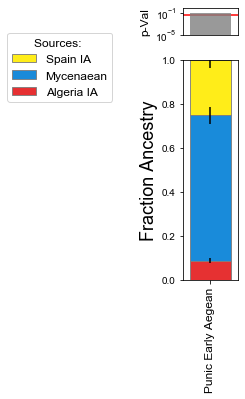

In [110]:
### Load the ancient Individual Label Data

t = "PunicCentralMedEarly"
sources = ["Algeria_IA", "Greece_BA_Mycenaean", "Spain_IA"]
paths = [".".join([t]+sources)]

dir_path = f"./output/qpAdm/v49.2/area51/"
save_path = "" # ./figures/qpAdm/v44/4way_Canaanite.pdf
c = ["#e41a1c", "#007ED6", "#FFEC00", "#984ea3", "gray"]

xlabels = ["Punic Early Aegean"]
plot_qpadm(dir_path=dir_path, test_pops=paths, save_path=save_path,
           xlabels=xlabels, sort_p=True, labels=["Algeria IA", "Mycenaean", "Spain IA"],
           best=False, pval_lim = [1e-5,1], figsize=(1,5), bw=0.9, lw=1.5, 
           fs=12, c=c, ec="gray", l_pos=(-1.15, 1.15))

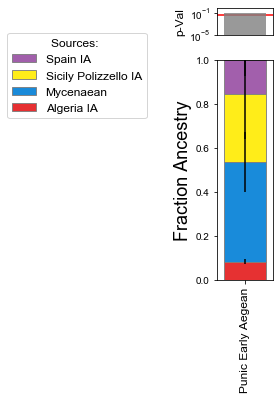

In [138]:
### Load the ancient Individual Label Data

t = "PunicCentralMedEarly"
sources = ["Algeria_IA", "Greece_BA_Mycenaean", "Italy_Sicily_IA_Polizzello", "Spain_IA"]
paths = [".".join([t]+sources)]

dir_path = f"./output/qpAdm/v49.2/area51/"
save_path = "" # ./figures/qpAdm/v44/4way_Canaanite.pdf
c = ["#e41a1c", "#007ED6", "#FFEC00", "#984ea3", "gray"]

xlabels = ["Punic Early Aegean"]
plot_qpadm(dir_path=dir_path, test_pops=paths, save_path=save_path,
           xlabels=xlabels, sort_p=True, labels=["Algeria IA", "Mycenaean", "Sicily Polizzello IA", "Spain IA"],
           best=False, pval_lim = [1e-5,1], figsize=(1,5), bw=0.9, lw=1.5, 
           fs=12, c=c, ec="gray", l_pos=(-1.15, 1.15))

# Area 51

### Try out single models

In [120]:
%%time

target = "Israel_C"  
sources = ["Levant_N", "Iran_N", "Anatolia_N"]  # Morocco_EN.SG, Algeria_IA

rightpops = ['Mota', 'Ust_Ishim', 'Kostenki14', 'GoyetQ116-1',
             'Vestonice16', 'MA1', 'ElMiron', 'Villabruna',
             'EHG', 'CHG', 'Natufian', "Morocco_EN.SG"]

leftpops = [target] + sources
qpAdm_run(leftpops = leftpops, rightpops = rightpops, 
          output_file = ".".join(leftpops), 
          input_folder = "./eigenstrat/", 
          input_file = "anc_only.v49.2",
          input_ind_suff = ".punic_early",
          par_file_folder = "./parfiles/", 
          output_folder = "./output/qpAdm/v49.2/area51/", 
          path_bin_qpAdm = "/n/groups/reich/hringbauer/git/AdmixTools/bin/qpAdm",
          all_snps=False)

Runtime: 54.134359
CPU times: user 3.41 ms, sys: 11.7 ms, total: 15.1 ms
Wall time: 54.1 s


0

In [132]:
%%time

target = "Israel_C"  
sources = ["Anatolia_N", "WHG", "Steppe_EMBA", "Tunisia_LN", "Iran_N", "Levant_N"] # Morocco_EN.SG, Algeria_IA
rightpops = ['Mota', 'Ust_Ishim', 'Kostenki14', 'GoyetQ116-1',
             'Vestonice16', 'MA1', 'ElMiron', 'Villabruna',
             'EHG', 'CHG', 'Natufian', "Morocco_EN.SG"]

leftpops = [target] + sources
qpAdm_run(leftpops = leftpops, rightpops = rightpops, 
          output_file = ".".join(leftpops), 
          input_folder = "./eigenstrat/", 
          input_file = "anc_only.v49.2",
          input_ind_suff = ".punic_early",
          par_file_folder = "./parfiles/", 
          output_folder = "./output/qpAdm/v49.2/area51/", 
          path_bin_qpAdm = "/n/groups/reich/hringbauer/git/AdmixTools/bin/qpAdm",
          all_snps=False)

Runtime: 84.836933
CPU times: user 6.06 ms, sys: 8.55 ms, total: 14.6 ms
Wall time: 1min 24s


0